In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

In [ ]:
x_m = x.sum(axis=0) / len(x)
b = x - x_m
s = (1 / (len(x) - 1)) * (b.T @ b)

In [ ]:
e, evr = np.linalg.eig(s)
pve = [ i / e.sum() for i in e ]
max_pve = 0
for i, val in enumerate(pve):
  if pve[i] > pve[max_pve]:
    max_pve = i
sel_comp = evr[max_pve]
print(f"Selected Principal component\n{sel_comp}")
print(f"PVE_PC1 = {pve[max_pve]}")

Selected Principal component
[ 0.6778734  -0.73517866]
PVE_PC1 = 0.9631813143486458


In [ ]:
y = x @ sel_comp
print(f"New dataset\n{y}")

New dataset
[-0.06974528 -0.17568836 -0.64069662 -0.32943358 -0.10412843 -0.42587355
  0.17946095 -0.13082312 -0.15947575  0.08399995]


PCA for mtcars

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
from io import BytesIO

In [ ]:
uploaded = files.upload()
file1 = next(iter(uploaded.keys()))
mtcars = pd.read_csv(BytesIO(uploaded[file1]))

Saving mtcars.csv to mtcars.csv


In [ ]:
dataset = mtcars.iloc[:, 1:]
std_dataset = StandardScaler().fit_transform(dataset)
means = std_dataset.sum() / len(std_dataset)
b = std_dataset - means
#b = b.to_numpy()

In [ ]:
s = (1 / (len(b) - 1)) * (b.T @ b)
print(s.shape)
print(f'First two rows of Cov matrix are\n{s[:2]}')

(11, 11)
First two rows of Cov matrix are
[[ 1.03225806 -0.87965105 -0.87489175 -0.80120606  0.7031452  -0.89564839
   0.43218997  0.68545953  0.61918186  0.49577781 -0.56869685]
 [-0.87965105  1.03225806  0.93113071  0.8593006  -0.72251676  0.80773759
  -0.6103144  -0.83696702 -0.53946534 -0.50857972  0.54398792]]


In [ ]:
e, evr = np.linalg.eig(s)
sort_order = e.argsort()[::-1]
e, evr = e[sort_order], evr[sort_order]
n_comp = 4
pve = [ei/e.sum() for ei in e]
pve_n_comp = sum(ei/e.sum() for ei in e[:n_comp])
print(f"Choosing first 4 components explain {round(pve_n_comp * 100, 2)}% of variance.")

Choosing first 4 components explain 92.32% of variance.


In [ ]:
e, evr = e[:n_comp], evr[:n_comp]
y = dataset @ evr.T
y = y.set_axis(['PC1', 'PC2', 'PC3', 'PC4'], axis='columns')
y = pd.concat([y, dataset[['mpg']]], axis = 1)
print(f"New dataset")
y.head()

New dataset


,PC1,PC2,PC3,PC4,mpg
0,71.771108,35.608632,-66.394286,34.777162,21.0
1,72.253503,35.751673,-66.344326,34.798532,21.0
2,59.443493,24.485834,-60.409782,24.892452,22.8
3,95.537851,54.446125,-62.315345,54.147421,21.4
4,124.385296,81.678191,-97.289302,71.519714,18.7


In [ ]:
import matplotlib.pyplot as plt

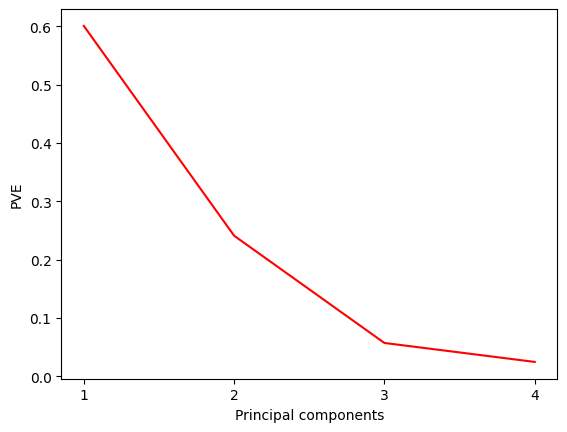

In [ ]:
plt.xlabel('Principal components')
plt.ylabel('PVE')
comp_count = range(1, len(pve[:4]) + 1);
plt.xticks(comp_count)
plt.plot(comp_count, pve[:4], 'r')
plt.show()

PCA using built in function

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x_iris = df.loc[:, features].values
y_iris = df['target']
x_iris = StandardScaler().fit_transform(x_iris)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pc = pca.fit_transform(x_iris)
new_df = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
new_df = pd.concat([new_df, y_iris], axis = 1)

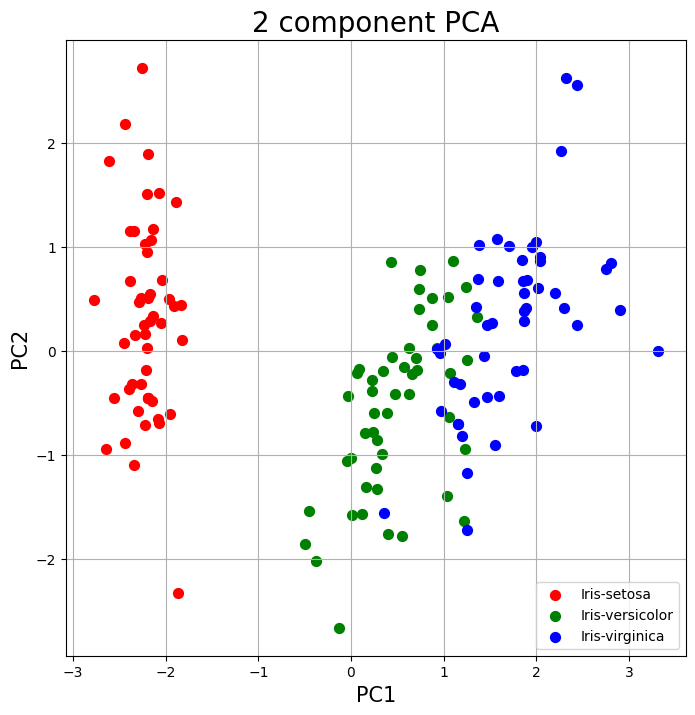

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  filtered_indices = new_df['target'] == target
  ax.scatter(
      new_df.loc[filtered_indices, 'PC1'],
      new_df.loc[filtered_indices, 'PC2'],
      c=color,
      s=50
  )
ax.legend(targets)
ax.grid()